data from https://www.kaggle.com/mattiuzc/commodity-futures-price-history


# 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!cp /gdrive/MyDrive/tmp/bitcoin.csv ./

# 데이터 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("bitcoin.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [ ]:
print(len(df))

4857377


# 결측치 분포 파악

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
print(df.Timestamp.min(), df.Timestamp.max())
diff = df.Timestamp.max() - df.Timestamp.min()
print(diff)
count_with_60_interval = diff / 60

# timestamp 최소와 최대 값 사이를 60으로 나눈 갯수와 전체 데이터 갯수가 다르다.
# 중간에 timestamp가 빈곳이 있다.
print(count_with_60_interval)
print(len(df))


1325317920 1617148800
291830880
4863848.0
4857377


In [ ]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = df.Timestamp.quantile(q)
    null_count = df[(df.Timestamp>=last_quantile) & (df.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile



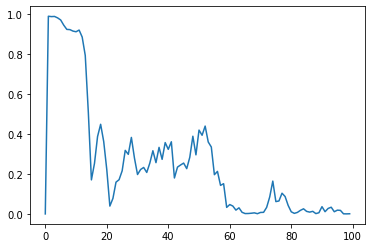

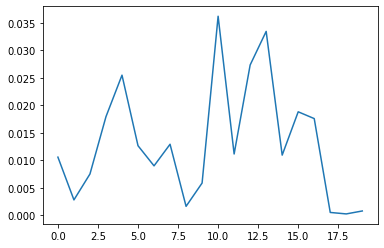

In [ ]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(df)*100.)
plt.show()

plt.plot(null_counts[80:]/len(df)*100.)
plt.show()

전체 데이터 중 80% 이후의 데이터는 최대 0.035%만 null이다. 

이 데이터 만을 가지고 하자. 그리고 결측치는 앞의 값으로 채우자.

# 대상 데이터 추림

In [ ]:
index_of_80_percent = int( len(df) * 0.8 )
df = df[df.index>index_of_80_percent]
print(len(df))

971475


In [ ]:
last_quantile = 0
null_counts = []
for q in np.arange(0, 1.0, 0.01):
    current_quantile = df.Timestamp.quantile(q)
    null_count = df[(df.Timestamp>=last_quantile) & (df.Timestamp<current_quantile)].Open.isnull().sum()
    null_counts.append(null_count)
    last_quantile = current_quantile

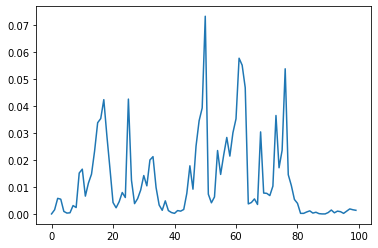

In [ ]:
null_counts = np.array(null_counts)
plt.plot(null_counts/len(df)*100.)
plt.show()

1개 구간이 1만 개 이다. 최대가 0.07이면 만개 중에 7개.
연속되어 있더라도 무시해도 되겠다.

0


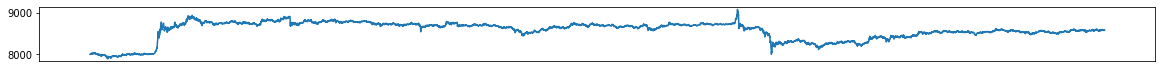

1


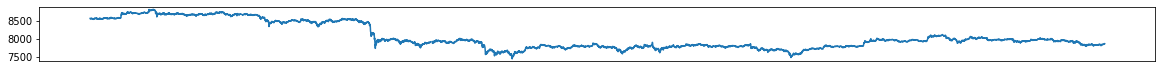

2


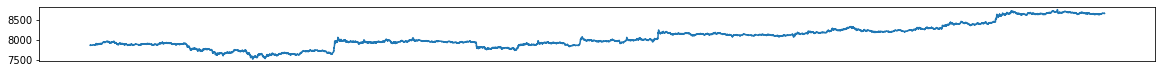

3


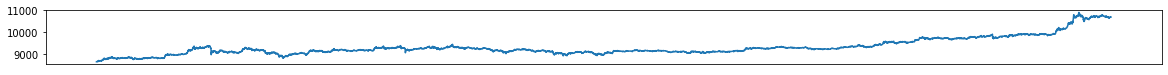

4


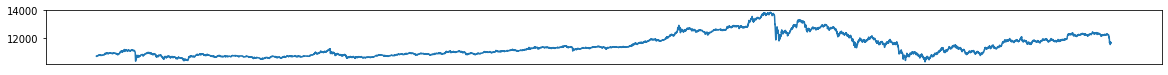

5


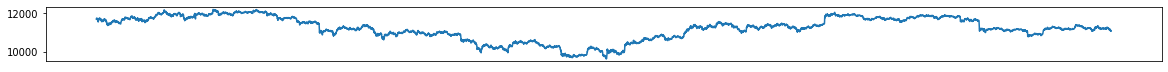

6


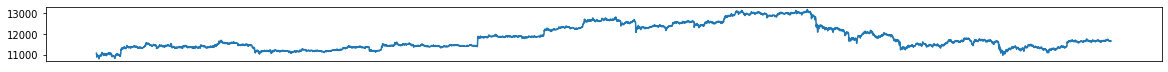

7


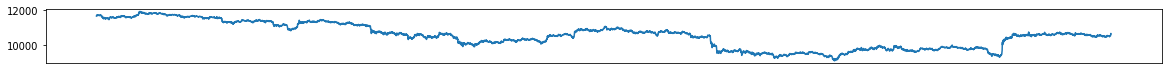

8


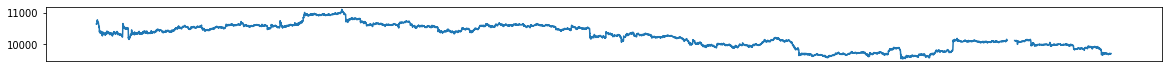

9


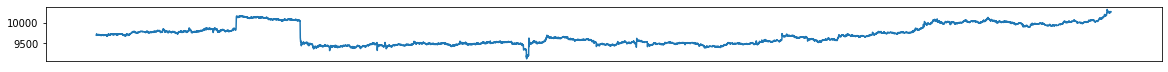

10


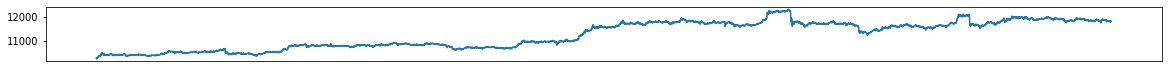

11


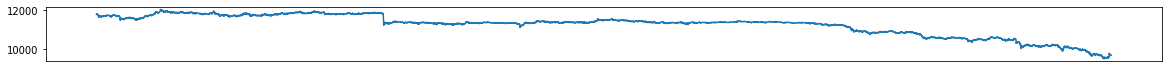

12


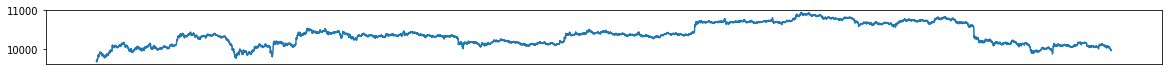

13


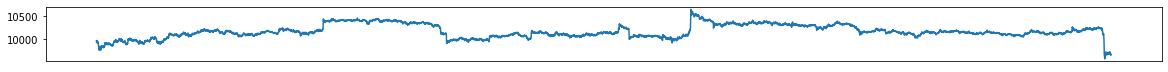

14


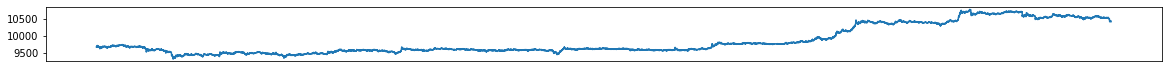

15


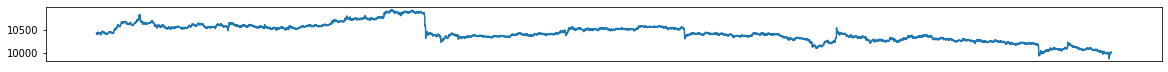

16


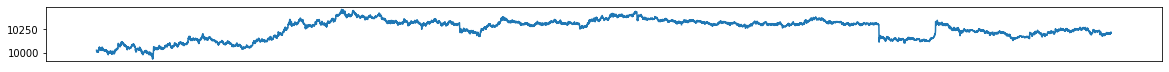

17


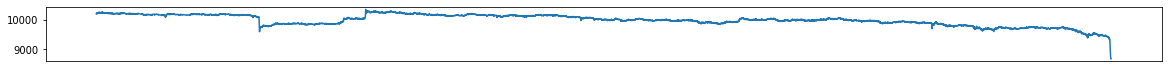

18


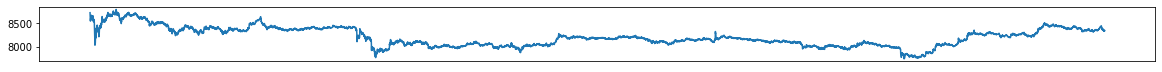

19


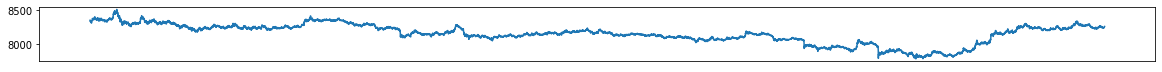

20


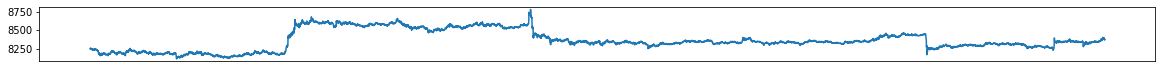

21


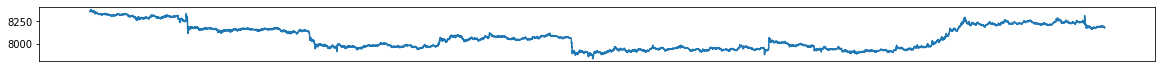

22


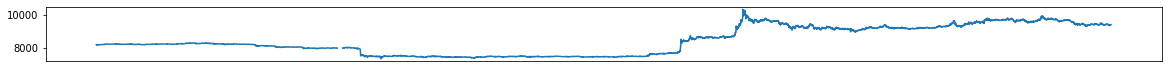

23


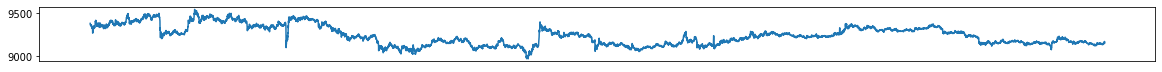

24


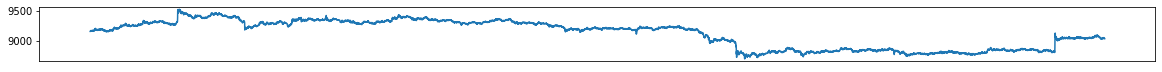

25


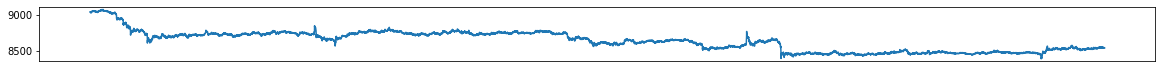

26


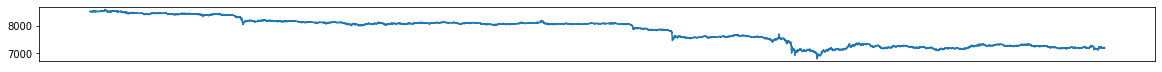

27


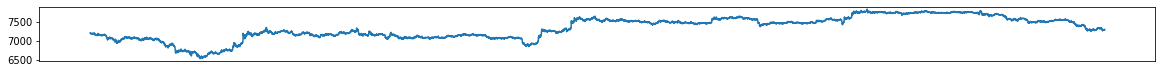

28


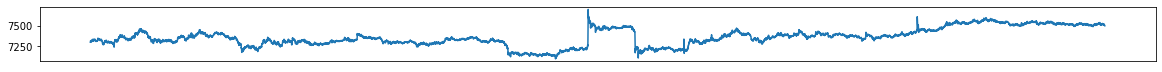

29


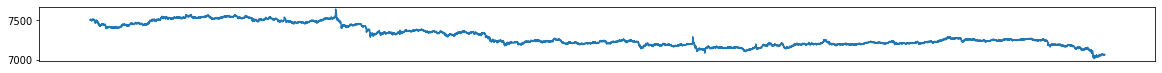

30


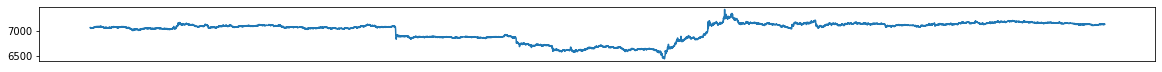

31


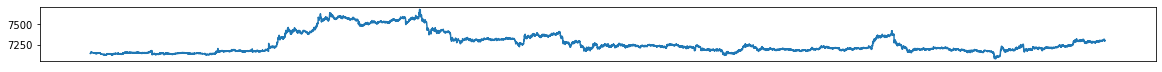

32


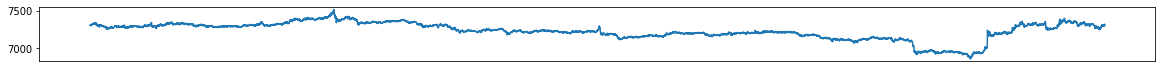

33


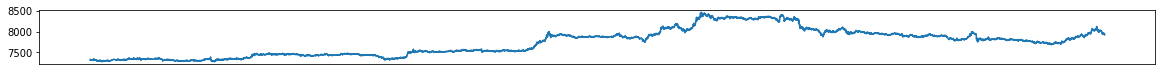

34


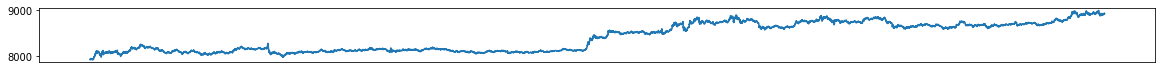

35


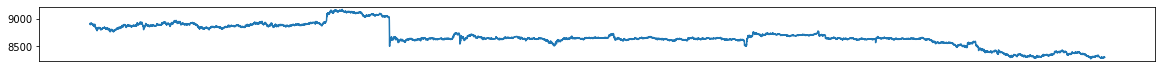

36


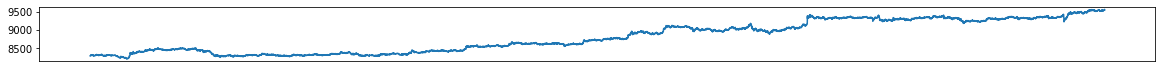

37


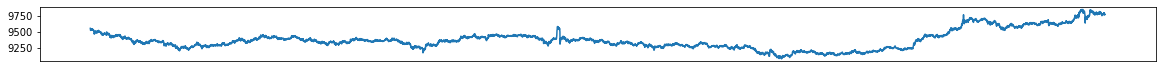

38


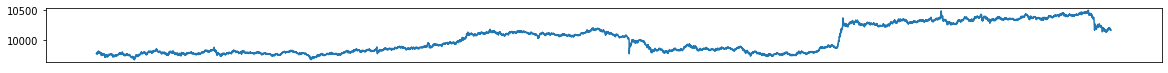

39


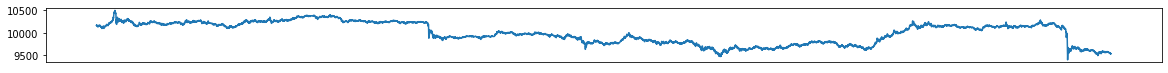

40


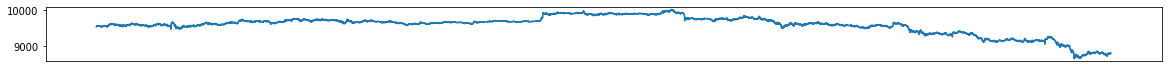

41


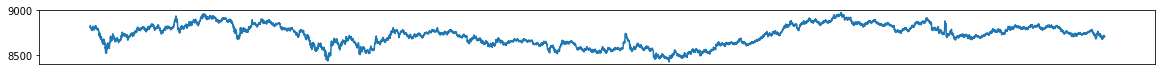

42


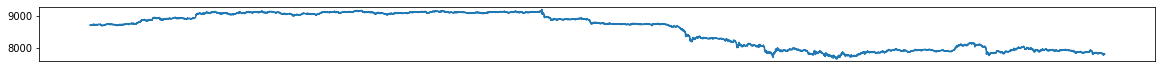

43


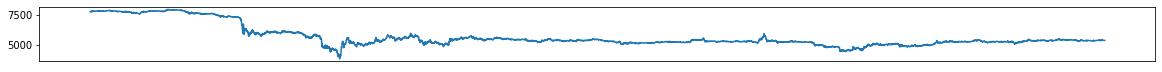

44


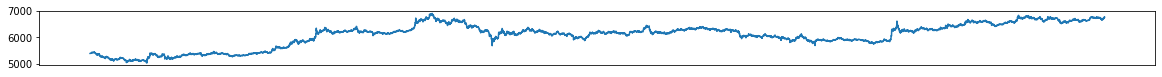

45


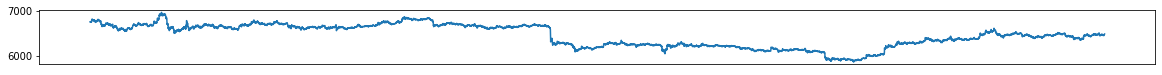

46


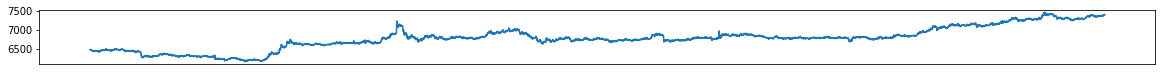

47


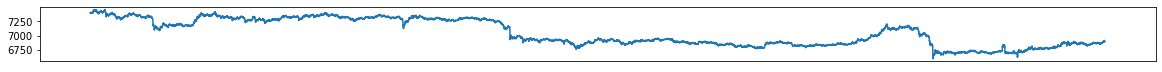

48


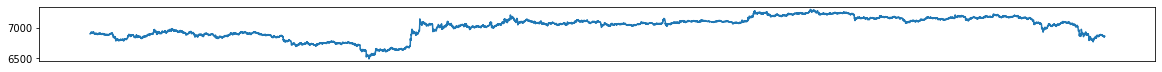

49


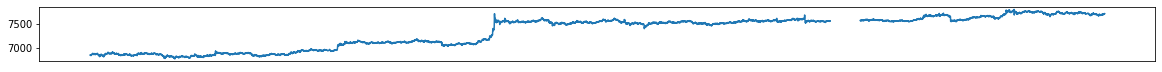

50


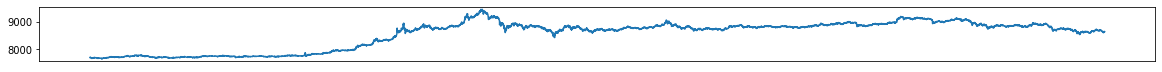

51


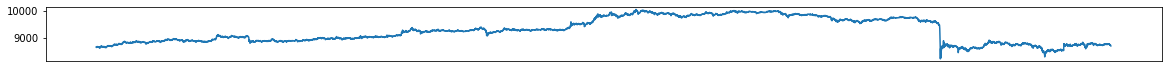

52


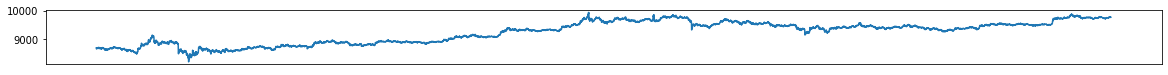

53


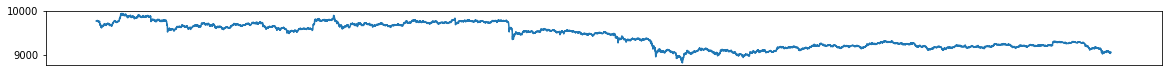

54


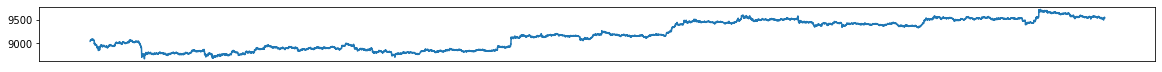

55


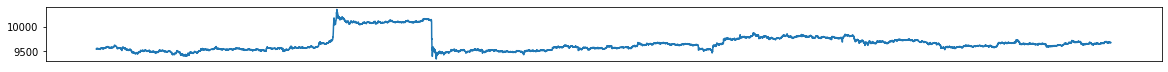

56


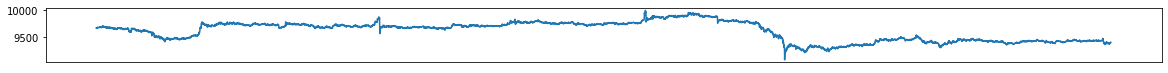

57


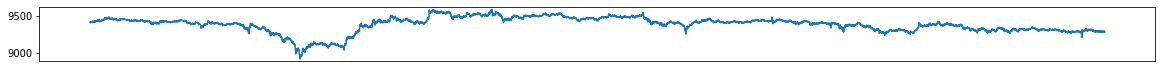

58


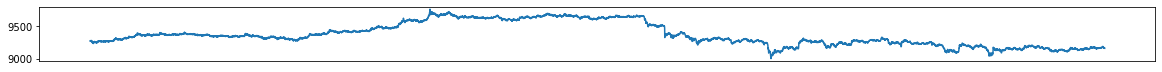

59


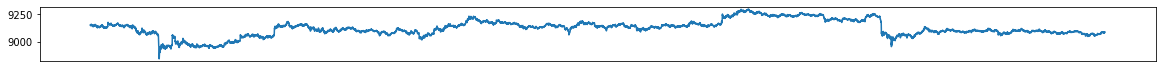

60


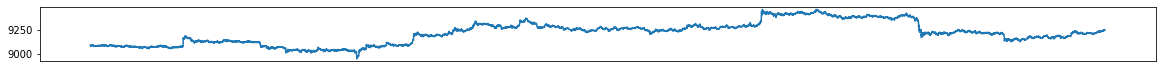

61


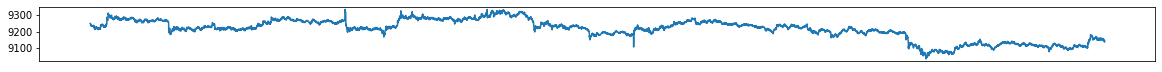

62


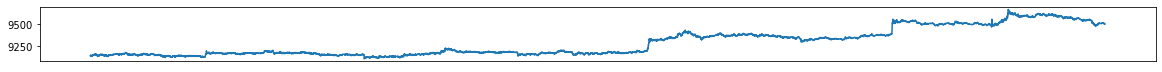

63


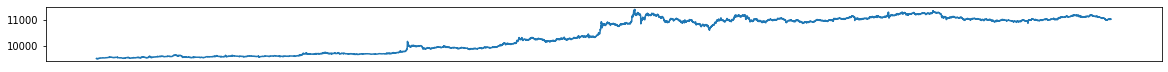

64


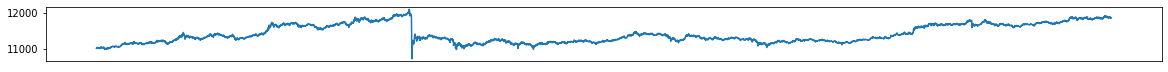

65


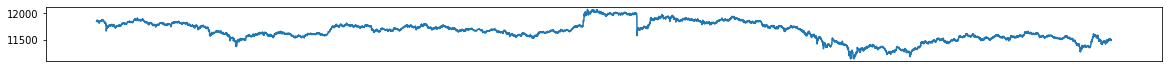

66


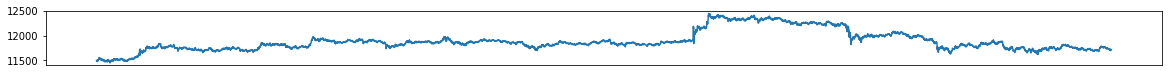

67


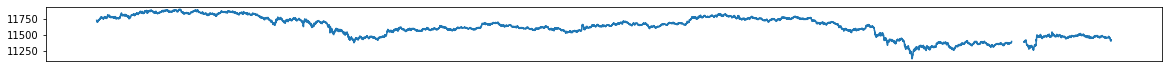

68


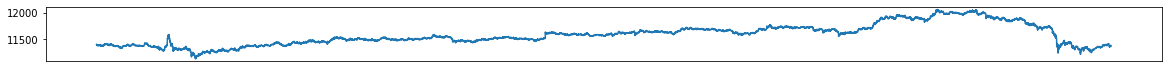

69


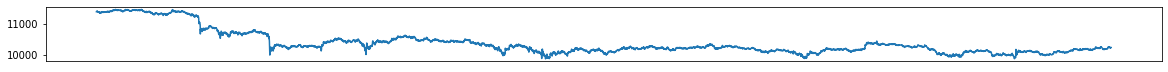

70


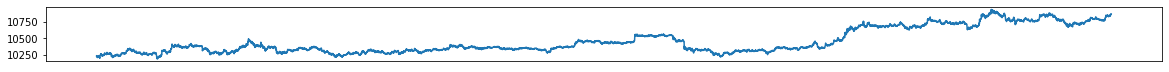

71


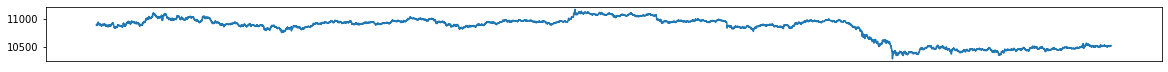

72


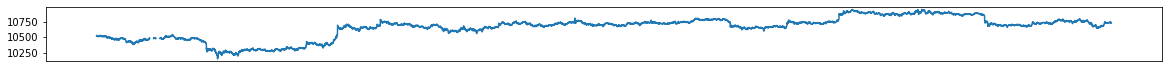

73


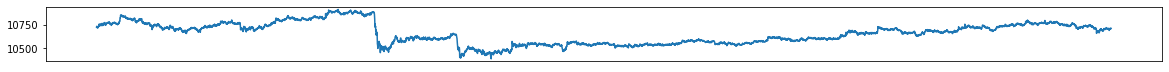

74


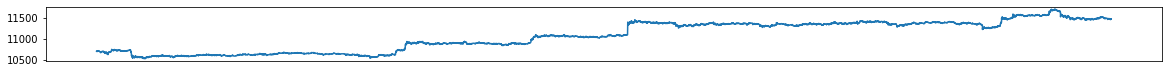

75


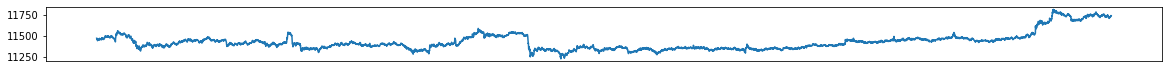

76


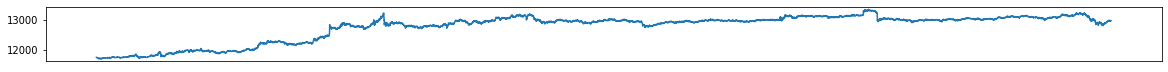

77


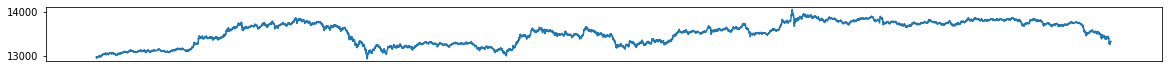

78


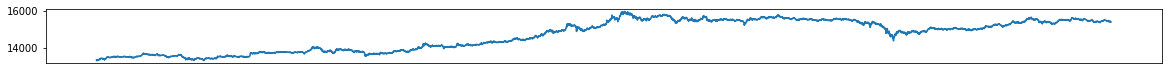

79


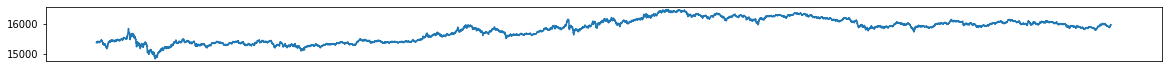

80


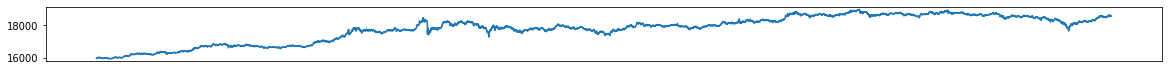

81


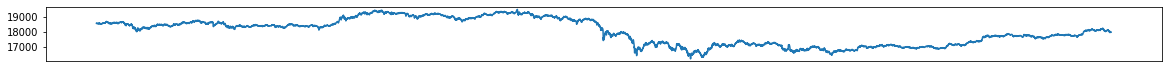

82


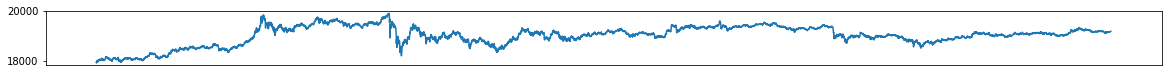

83


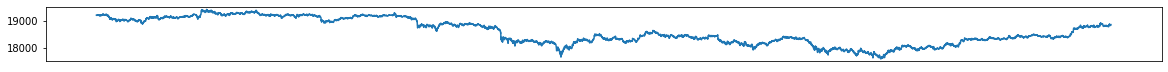

84


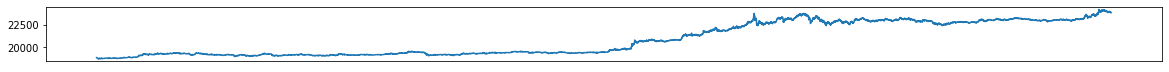

85


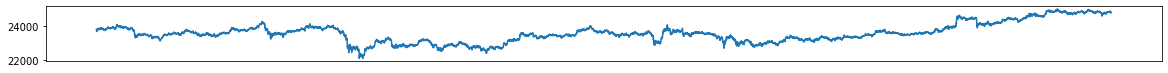

86


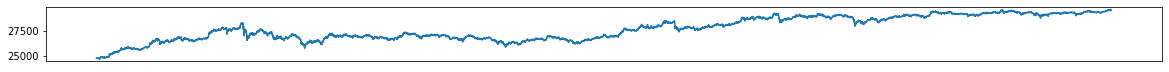

87


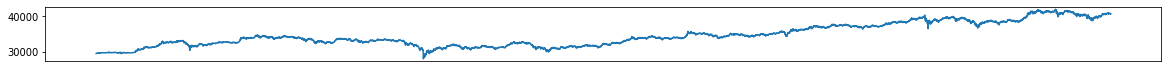

88


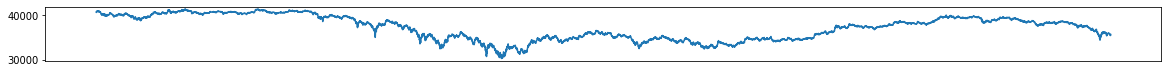

89


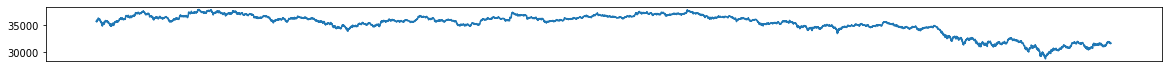

90


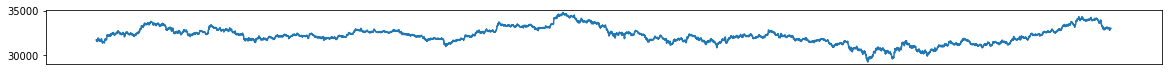

91


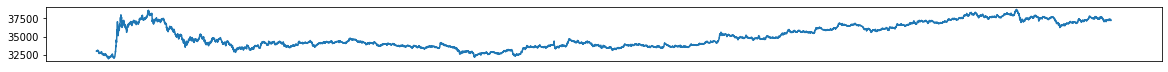

92


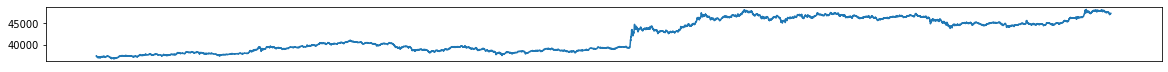

93


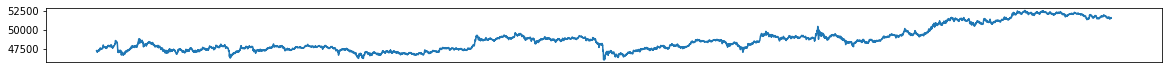

94


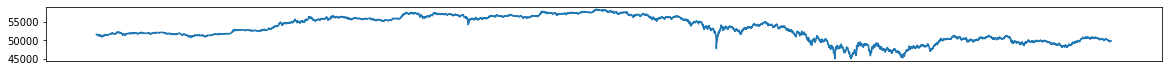

95


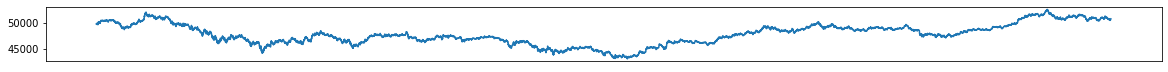

96


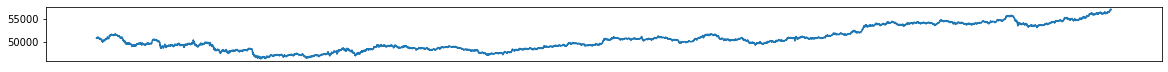

97


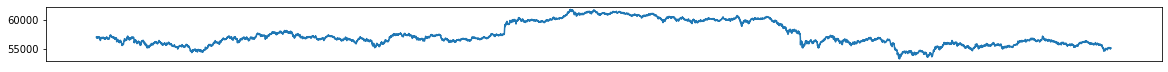

98


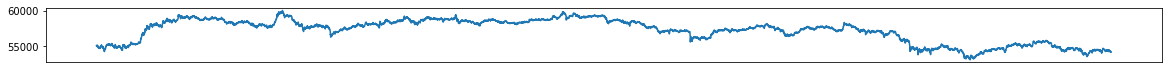

99


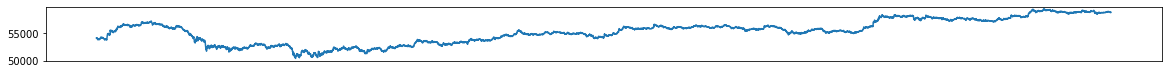

In [ ]:
interval = int(len(df)/100)
for i in range(100):
    print(i)
    plt.figure(figsize=(20,1))
    plt.plot(df.Open[i*interval:(i+1)*interval])
    plt.xticks([])
    plt.show()

# 결측치 처리

In [ ]:
print(df.isnull().sum())

Timestamp                0
Open                 12383
High                 12383
Low                  12383
Close                12383
Volume_(BTC)         12383
Volume_(Currency)    12383
Weighted_Price       12383
dtype: int64


In [ ]:
df.fillna(method="ffill", inplace=True)

In [ ]:
print(df.isnull().sum().sum())

0


# 불필요 컬럼 삭제

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3885902,1558860360,8000.37,8003.18,8000.37,8002.67,1.267878,10147.051640,8003.175605
3885903,1558860420,8003.56,8005.46,8003.56,8003.56,0.037853,302.979753,8004.207711
3885904,1558860480,8005.46,8015.30,8003.57,8003.76,14.216468,113824.502040,8006.524723
3885905,1558860540,8006.68,8012.76,8006.68,8011.57,0.591876,4741.154568,8010.379478
3885906,1558860600,8008.77,8020.15,8008.77,8012.51,1.854827,14864.621864,8014.019345


In [ ]:
df.drop(columns=["Timestamp"], inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3885902,8000.37,8003.18,8000.37,8002.67,1.267878,10147.051640,8003.175605
3885903,8003.56,8005.46,8003.56,8003.56,0.037853,302.979753,8004.207711
3885904,8005.46,8015.30,8003.57,8003.76,14.216468,113824.502040,8006.524723
3885905,8006.68,8012.76,8006.68,8011.57,0.591876,4741.154568,8010.379478
3885906,8008.77,8020.15,8008.77,8012.51,1.854827,14864.621864,8014.019345


# 각 컬럼 분포 보기

Open


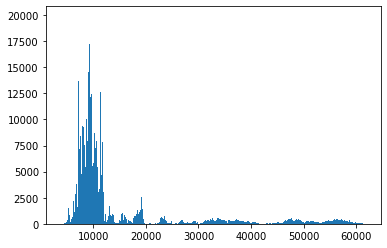

High


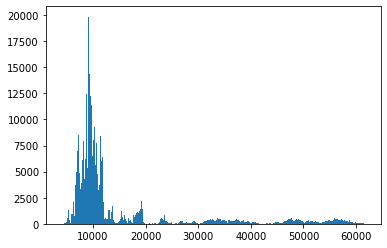

Low


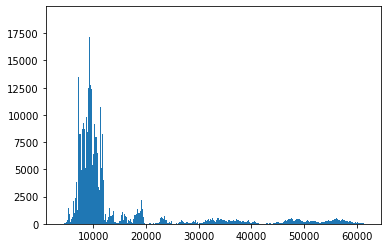

Close


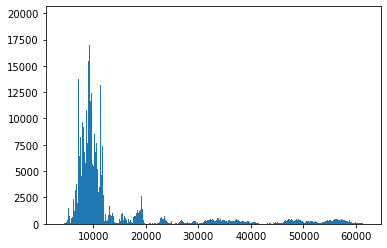

Volume_(BTC)


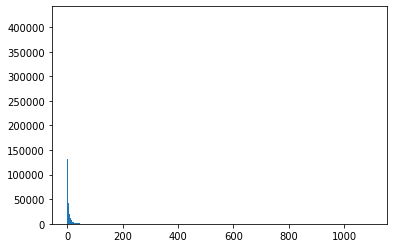

Volume_(Currency)


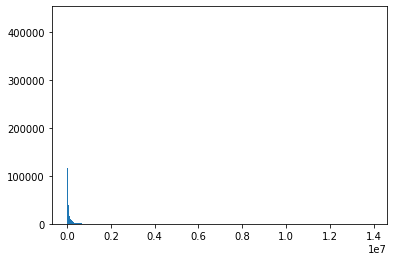

Weighted_Price


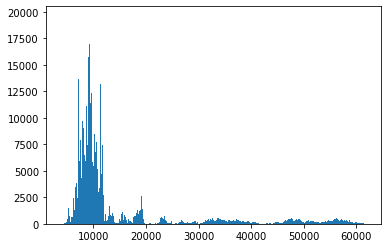

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

# 모든 컬럼 로그 처리

In [ ]:
df = np.log(df+1)

Open


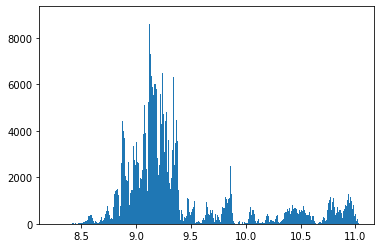

High


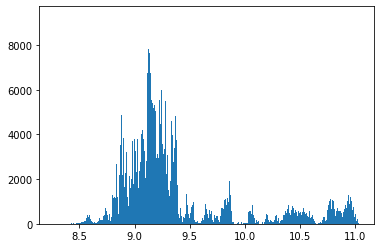

Low


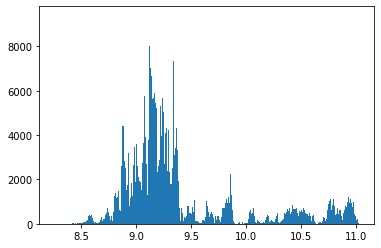

Close


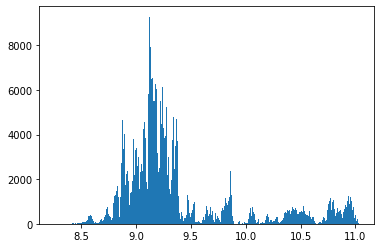

Volume_(BTC)


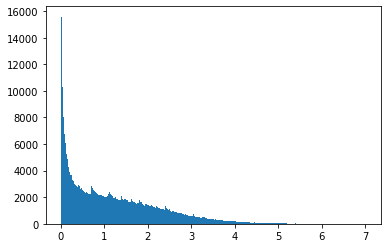

Volume_(Currency)


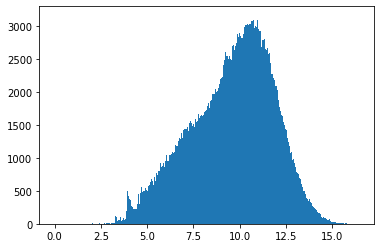

Weighted_Price


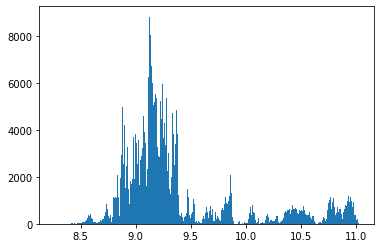

In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])
    plt.hist(df.iloc[:,i], bins=1000)
    plt.show()

# numpy 변환

In [ ]:
raw_data = df.to_numpy()
print(raw_data.shape)

(971475, 7)


In [ ]:
print(raw_data[:5])

[[ 8.98736806  8.98771918  8.98736806  8.98765547  0.81884467  9.22503701
   8.98771864]
 [ 8.98776666  8.98800399  8.98776666  8.98776666  0.03715373  5.7169611
   8.98784757]
 [ 8.98800399  8.98923225  8.98776791  8.98779164  2.72237826 11.64242187
   8.98813697]
 [ 8.98815636  8.98891534  8.98815636  8.98876684  0.46491345  8.46424686
   8.98861824]
 [ 8.98841733  8.98983708  8.98841733  8.98888415  1.04901135  9.60680657
   8.98907248]]


# normalize

In [ ]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[11.03108502 11.03138077 11.02962665 11.03138029  7.05481083 16.44744784
 11.03031803]
[7.51261754 7.51533912 7.51261754 7.51261754 0.         0.
 7.51311635]


In [ ]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.4191457  0.4187607  0.4193195  0.41919221 0.11606898 0.56087954
  0.4192544 ]
 [0.41925899 0.4188417  0.41943284 0.41922381 0.00526644 0.34758956
  0.41929106]
 [0.41932644 0.41919103 0.41943319 0.41923091 0.38588962 0.70785583
  0.41937334]
 [0.41936975 0.4191009  0.41954364 0.41950805 0.0659002  0.51462372
  0.41951018]
 [0.41944392 0.41936305 0.41961785 0.41954139 0.14869447 0.58409102
  0.41963932]]


In [ ]:
preprocessed = normalized

# 파라매터 설정

In [ ]:
SEQUENCE_LENGTH = 16 * 60
OFFSET = 16 * 60
BATCH_SIZE = 32
SAMPLING_COUNT = 10000

# by Data Sampling

## 샘플링

In [ ]:
numbers = preprocessed

In [ ]:
raw_x = []
raw_y = []

for j in range(SAMPLING_COUNT):
  i = np.random.randint(len(numbers)-SEQUENCE_LENGTH-OFFSET)
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [ ]:
print(raw_x[0])
print(raw_y[0])
print()
print(raw_x[1])
print(raw_y[1])

[[0.50081581 0.50038729 0.50088241 ... 0.03137982 0.479091   0.50084505]
 [0.50067774 0.50038676 0.50088535 ... 0.00629496 0.37601244 0.50078689]
 [0.500698   0.5002694  0.50090562 ... 0.00191935 0.30313453 0.50073637]
 ...
 [0.50220802 0.50186643 0.50221271 ... 0.38821751 0.72663646 0.50219377]
 [0.502034   0.50183486 0.50224218 ... 0.25629036 0.6632384  0.50225919]
 [0.5022942  0.50187227 0.50242449 ... 0.01393033 0.42622443 0.50233544]]
[0.50296202 0.50265221 0.50314332 0.50289839 0.06125778 0.52697123
 0.503025  ]

[[0.81734172 0.81795785 0.81749272 ... 0.50899233 0.84831214 0.81786636]
 [0.81743    0.8173435  0.8172697  ... 0.42014759 0.80857919 0.81738372]
 [0.81722165 0.81724548 0.81739933 ... 0.40249519 0.80055119 0.81730894]
 ...
 [0.8349574  0.83475941 0.8337036  ... 0.27310296 0.74271234 0.83399562]
 [0.83340651 0.833897   0.8335947  ... 0.21557567 0.71258641 0.83386218]
 [0.83394771 0.83588191 0.83387458 ... 0.41917068 0.81199533 0.83542455]]
[0.83145262 0.83154877 0.831334

In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(10000, 960, 7)
(10000, 7)
Training Data:
(9000, 960, 7)
(9000, 7)
Test Data:
(1000, 960, 7)
(1000, 7)


train_x[0]
 [[0.46165174 0.46124639 0.46184317 ... 0.10307423 0.55959159 0.46167942]
 [0.46169455 0.46123904 0.46172717 ... 0.00276952 0.3171625  0.46163179]
 [0.46153579 0.46123721 0.46168309 ... 0.112305   0.56702376 0.46163352]
 ...
 [0.46022958 0.45977306 0.46018229 ... 0.13524131 0.58364397 0.4602141 ]
 [0.46021052 0.45978229 0.460274   ... 0.08496057 0.54320092 0.46013062]
 [0.45999094 0.45963798 0.45998771 ... 0.1697587  0.60611142 0.45994729]]

train_y[0]
 [0.45868841 0.45823082 0.45824001 0.45801164 0.3669267  0.70744045
 0.45833943]


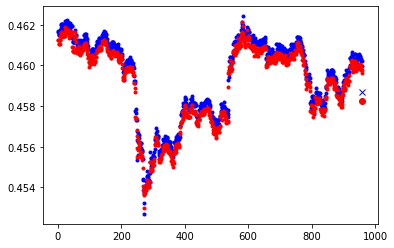

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

## 학습

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               69632     
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
 dense_8 (Dense)             (None, 7)                 77        
                                                                 
Total params: 70,999
Trainable params: 70,999
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
24591/24591 [==============================] - 351s 14ms/step - loss: 0.0040 - mape: 260.8322 - val_loss: 0.0035 - val_mape: 1172.0680
Epoch 2/10
24591/24591 [============

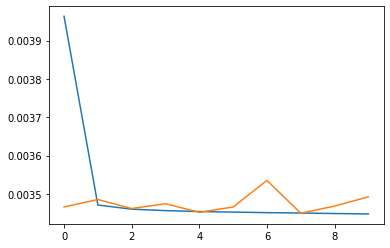

3036/3036 [==============================] - 15s 5ms/step - loss: 0.0035 - mape: 123.8603
loss= 0.003480086801573634
mape= 123.86034393310547


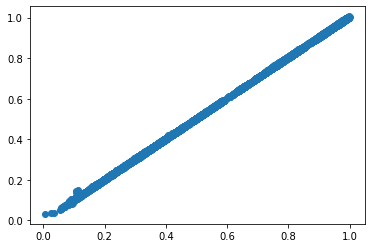

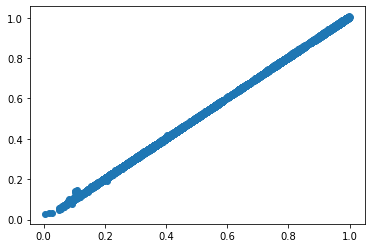

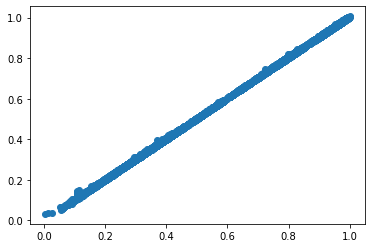

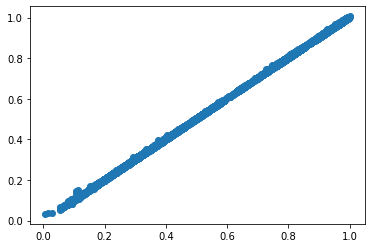

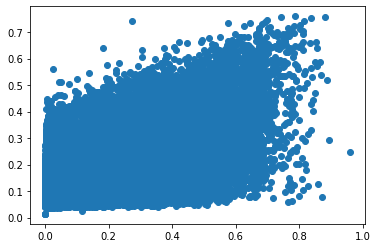

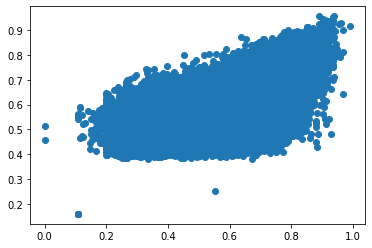

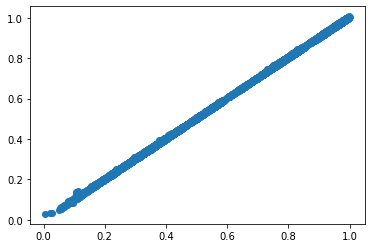

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=BATCH_SIZE)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## 결과 보기

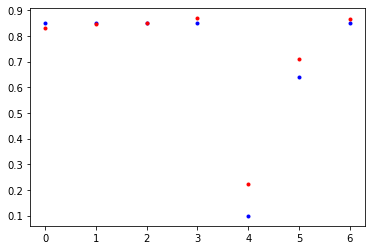

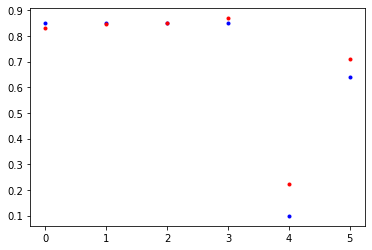

In [ ]:
plt.plot(test_y[0], 'b.')
plt.plot(y_[0], 'r.')
plt.show()

plt.plot(test_y[0,:-1], 'b.')
plt.plot(y_[0,:-1], 'r.')
plt.show()

In [ ]:
denomalized_test_y = test_y * (maxs - mins) + mins
denomalized_y_ = y_ * (maxs - mins) + mins
delogged_test_y = np.exp(denomalized_test_y) - 1
delogged_y = np.exp(denomalized_y_) - 1


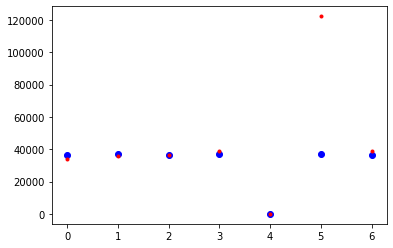

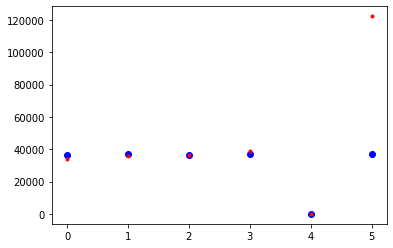

In [ ]:
plt.plot(delogged_test_y[0], 'bo')
plt.plot(delogged_y[0], 'r.')
plt.show()

plt.plot(delogged_test_y[0,:-1], 'bo')
plt.plot(delogged_y[0,:-1], 'r.')
plt.show()